In [92]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [94]:
def MSD(x,y):
    suma=0
    for n in range(len(x)):
        suma+=(x[n]-x[0])**2+(y[n]-y[0])**2

    return suma/len(x)

def lineal(x, a, b):
    return a*x + b

def cuadratica(x, a, b, c):
    return a*x**2 + b*x + c

In [84]:
datos = np.genfromtxt('Mediciones/muestra 1 en 6 browniano.txt', delimiter=',')
print(np.shape(datos))

(431, 19)


In [85]:
# extraigo los datos a algo útil de usar

t = datos[2:].T[0] # en qué unidad está ??? mismo x e y

lista_pos=[]

for i in range(1, len(datos[0]), 2):
    xy = []
    for j in datos:
        if np.isnan(j[i]) == False: 
            xy.append([j[i], j[i+1]])
    xy = np.array(xy)
    lista_pos.append(xy)

lista_bien  = []
for part in lista_pos:
    np.stack(part)
    lista_bien.append(part.T)

In [86]:
# para entender el indexeado
print(f'lista_pos: {type(lista_pos)}, {len(lista_pos)}\npart: {type(lista_pos[0])}, {len(lista_pos[0])}\ncoord: {type(lista_pos[0][0])}, {len(lista_pos[0][0])}')
print(f'shape part lista_pos:{np.shape(lista_pos[0])}')

print(f'lista_bien: {type(lista_bien)}, {len(lista_bien)}\npart: {type(lista_bien[0])}, {len(lista_bien[0])}\ncoord: {type(lista_bien[0][0])}, {len(lista_bien[0][0])}')
print(f'shape part lista_bien:{np.shape(lista_bien[0])}')

# hay que sí o sí trasponer part

lista_pos: <class 'list'>, 9
part: <class 'numpy.ndarray'>, 429
coord: <class 'numpy.ndarray'>, 2
shape part lista_pos:(429, 2)
lista_bien: <class 'list'>, 9
part: <class 'numpy.ndarray'>, 2
coord: <class 'numpy.ndarray'>, 429
shape part lista_bien:(2, 429)


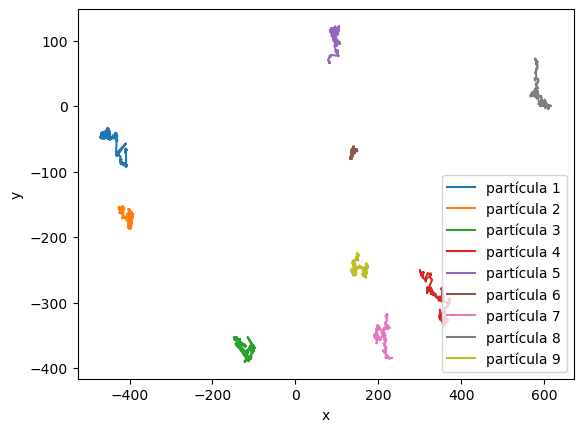

In [87]:
fig, ax = plt.subplots()
for n, part in enumerate(lista_bien):
    x = part[0]
    y = part[1]
    ax.plot(x, y, label=f'partícula {n+1}')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()

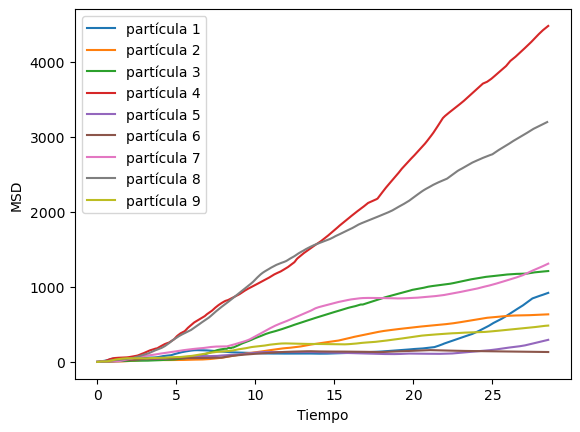

In [88]:
# MSD
fig, ax = plt.subplots()

lista_MSD = []
for n, part in enumerate(lista_bien):
    x = part[0]
    y = part[1]
    part_MSD = []
    for i in range(len(x)):    
        msd = MSD(x[:i+1], y[:i+1])
        part_MSD.append(msd)
    lista_MSD.append(part_MSD)

for n, disp in enumerate(lista_MSD):
    t1 = t[:len(disp)] # esto es porque hay un frame menos de la prtícula 8, asi que para plotear tengo que acortar el tiempo a la longitud de cada set de datos 
    ax.plot(t1, disp, label=f'partícula {n+1}')
ax.set_xlabel('Tiempo')
ax.set_ylabel('MSD')
ax.legend()

Ajuste lineal m*x + b1
m = 50.75833943306964 +- 0.1807793098079688
b1 = -107.5973856447798 +- 2.9726917613174324
R^2 = 0.9946253305520931

Ajuste cuadrático a*x^2 + b2*x + c
a = 0.42755718578585267 +- 0.013171999771814913
b2 = 38.58802294529742 +- 0.38729070332197746
c = -49.99506122452348 +- 2.3864460465662276
R^2 = 0.9984551605275191


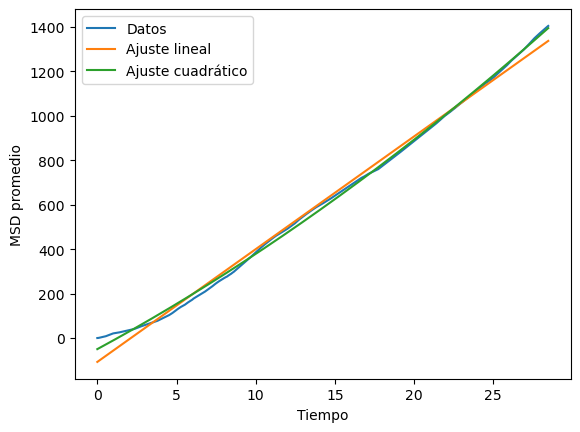

In [108]:
MSD_promedio = []
for n in range(len(lista_MSD[0])-1): # como hay un frame menos en la partícula 8 promedio hasta ese 
    val = 0
    for disp in lista_MSD:
        val += disp[n]
    MSD_promedio.append(val/len(lista_MSD))


# esto para cuando las mediciones son todas de igual longitud:

# val = 0
# for disp in lista_MSD:
#         val += disp[-1]
# MSD_promedio.append(val/len(lista_MSD))

# Ajuste lineal
popt_lin, pcov_lin = curve_fit(lineal, t[:len(MSD_promedio)], MSD_promedio, p0=[50, 0])
m, b1 = popt_lin
perr_lin = np.sqrt(np.diag(pcov_lin))
err_m, err_b1 = perr_lin

# R^2 lineal:
res_lin = MSD_promedio- lineal(t[:len(MSD_promedio)], *popt_lin)
ss_res_lin = np.sum(res_lin**2)
ss_tot_lin = np.sum((MSD_promedio-np.mean(MSD_promedio))**2)
r_cuadrado_lin = 1 - (ss_res_lin / ss_tot_lin)

print(f'Ajuste lineal m*x + b1\nm = {m} +- {err_m}\nb1 = {b1} +- {err_b1}\nR^2 = {r_cuadrado_lin}\n')

# Ajuste cuadrático
popt_cuad, pcov_cuad = curve_fit(cuadratica, t[:len(MSD_promedio)], MSD_promedio, p0=[0, 50, 0])
a, b2, c = popt_cuad
perr_cuad = np.sqrt(np.diag(pcov_cuad))
err_a, err_b2, err_c = perr_cuad

# R^2 cuadrático:
res_cuad = MSD_promedio- cuadratica(t[:len(MSD_promedio)], *popt_cuad)
ss_res_cuad = np.sum(res_cuad**2)
ss_tot_cuad = np.sum((MSD_promedio-np.mean(MSD_promedio))**2)
r_cuadrado_cuad = 1 - (ss_res_cuad / ss_tot_cuad)

print(f'Ajuste cuadrático a*x^2 + b2*x + c\na = {a} +- {err_a}\nb2 = {b2} +- {err_b2}\nc = {c} +- {err_c}\nR^2 = {r_cuadrado_cuad}')

x = np.linspace(t[0], t[:len(MSD_promedio)][-1], 1000)
y_fit_lin = lineal(x, m, b1)
y_fit_cuad = cuadratica(x, a, b2, c)

fig, ax = plt.subplots()
ax.plot(t[:len(MSD_promedio)], MSD_promedio, label='Datos')
ax.plot(x, y_fit_lin, label='Ajuste lineal')
ax.plot(x, y_fit_cuad, label='Ajuste cuadrático')
ax.set_xlabel('Tiempo')
ax.set_ylabel('MSD promedio')
ax.legend()